In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

En esta práctica se aplicó el algoritmo de agrupamiento no supervisado k-means para identificar grupos o clústeres en el conjunto de datos. Se utilizaron cuatro varaibles para realizar el clustering respecto al overall de los jugadores

In [14]:
# Cargar datos
df = pd.read_csv(r"C:\Users\angel\OneDrive\Escritorio\OCTAVO SEM\MINERIA DE DATOS\REPOSITORIO\AOAG_MinDat035\DATASET\players_20.csv")

In [ ]:
# Seleccionar variables numéricas relevantes para clustering
X = df[['overall', 'potential', 'age', 'value_eur', 'wage_eur']].dropna()

# Escalar variables para que tengan media 0 y varianza 1 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elegir número de clusters k 
k = 4


In [16]:
# Crear el modelo k-means y ajustarlo
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
labels = kmeans.labels_
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Crear un DataFrame con las filas limpias y agregar etiquetas para cada cluster
df_clean = df.loc[X.index].copy()
df_clean['cluster'] = labels

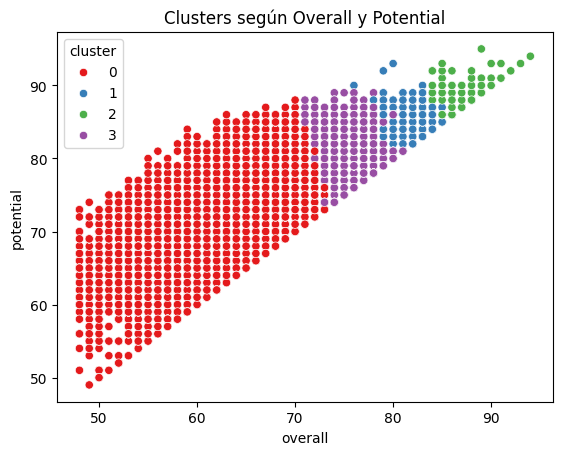

In [18]:
sns.scatterplot(data=df_clean, x='overall', y='potential', hue='cluster', palette='Set1')
plt.title('Clusters según Overall y Potential')
plt.show()

In [19]:
print(df_clean.groupby('cluster')[['overall', 'potential', 'age']].mean())

           overall  potential        age
cluster                                 
0        64.338435  70.082031  25.038038
1        81.901333  84.658667  26.213333
2        86.941176  89.117647  26.352941
3        75.789059  78.891052  26.376449


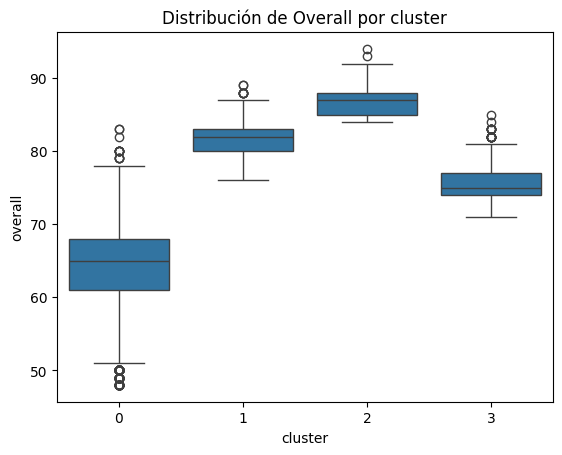

In [20]:
sns.boxplot(x='cluster', y='overall', data=df_clean)
plt.title('Distribución de Overall por cluster')
plt.show()